<a href="https://colab.research.google.com/github/LicaCepillo/dio_data_python_pandas/blob/main/tabelal_excel_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importando a biblioteca pandas
import pandas as pd

In [ ]:
#Leitura dos arquivos
df1 = pd.read_excel("/content/drive/MyDrive/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/datasets/Salvador.xlsx")


In [ ]:
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
#Juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
#Exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
#Exibir as 5 ultimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
#Pegr uma amostra da tabela
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
156,Salvador,2019-01-02,36.14,1037,3
73,Aracaju,2018-01-01,159.78,1521,3
35,Aracaju,2018-01-01,40.60,1520,3
114,Fortaleza,2019-03-02,16.82,983,4
103,Fortaleza,2019-01-01,142.57,1002,3


In [ ]:
#Verificando o tio de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
#Alterando o tio de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
#Consultando linhas com valors faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(),inplace=True)

In [ ]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Substituir valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [ ]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#apagar as linhas com valores nulos
df.dropna(inplace=True)

In [ ]:
#apagando as linhas con valores nulos com base apenas em 1 colunad
df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
#Remover lnhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

CRIANDO COLUNAS NOVAS


In [ ]:
#Criando uma nova coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
#Retonando a maior receita
df["Receita"].max()


3544.0

In [ ]:
#Retornando a menor receita
df["Receita"].min()

3.34

In [ ]:
#nlargest trazer as maiores receitas
df.nlargest(3,"Receita")

In [ ]:
#nsmallest três piores receitas
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [ ]:
#Agrupar por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


### TRABALHANDO COM DATAS

In [ ]:
#Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [ ]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [ ]:
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [ ]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
127,Recife,2019-03-02,39.56,982,8,316.48,2019
201,Natal,2019-01-02,86.61,1036,1,86.61,2019
111,Aracaju,2018-01-01,24.25,1523,1,24.25,2018
126,Aracaju,2018-01-01,13.41,1520,7,93.87,2018
164,Salvador,2019-01-02,6.59,1035,1,6.59,2019


In [ ]:
#Extraindo o mês e o dia
df["Mes_Venda"], df["Dia_Venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda
94,Natal,2019-01-02,33.24,1037,1,33.24,2019,1,2
29,Salvador,2019-01-01,9.27,1034,1,9.27,2019,1,1
27,Natal,2018-07-16,390.00,853,3,1170.00,2018,7,16
123,Fortaleza,2019-03-02,20.22,981,6,121.32,2019,3,2
68,Aracaju,2018-01-01,179.74,1520,2,359.48,2018,1,1


In [ ]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#Retornando a data mais recente
df["Data"].max()

Timestamp('2019-04-05 00:00:00')

In [ ]:
df["Diferenca_dias"] = (df["Data"]) - (df["Data"].min())

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_dias
44,Fortaleza,2019-01-01,215.11,1003,1,215.11,2019,1,1,365 days
178,Salvador,2019-01-02,39.28,1037,3,117.84,2019,1,2,366 days
210,Salvador,2019-01-02,197.64,1035,1,197.64,2019,1,2,366 days
17,Aracaju,2018-01-01,162.19,1522,9,1459.71,2018,1,1,0 days
225,Natal,2019-01-02,36.23,1035,1,36.23,2019,1,2,366 days


In [ ]:
#Explorando coluna de trimestre
df["Trimestre_Venda"] = df["Data"].dt.quarter

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_dias,Trimestre_Venda
60,Natal,2018-05-02,534.00,852,3,1602.00,2018,5,2,121 days,2
2,Salvador,2019-02-10,173.59,1035,3,520.77,2019,2,10,405 days,1
237,Natal,2019-01-03,38.06,1036,3,114.18,2019,1,3,367 days,1
71,Fortaleza,2019-01-01,41.89,1004,4,167.56,2019,1,1,365 days,1
78,Salvador,2019-01-01,111.20,1036,3,333.60,2019,1,1,365 days,1


In [ ]:
#Filtrando as vendas 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [ ]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_dias,Trimestre_Venda
125,Fortaleza,2019-03-02,37.60,983,4,150.40,2019,3,2,425 days,1
120,Salvador,2019-03-02,140.17,1036,2,280.34,2019,3,2,425 days,1
130,Fortaleza,2019-03-02,12.36,983,4,49.44,2019,3,2,425 days,1
131,Recife,2019-03-02,139.07,982,6,834.42,2019,3,2,425 days,1
7,Natal,2019-03-18,886.00,853,4,3544.00,2019,3,18,441 days,1
119,Recife,2019-03-02,152.30,982,7,1066.10,2019,3,2,425 days,1
2,Natal,2019-03-11,308.00,852,3,924.00,2019,3,11,434 days,1
117,Salvador,2019-03-02,39.41,1034,1,39.41,2019,3,2,425 days,1
18,Natal,2019-03-14,581.00,853,3,1743.00,2019,3,14,437 days,1
116,Recife,2019-03-02,79.10,982,2,158.20,2019,3,2,425 days,1


##**Visualização de Dados**


In [ ]:
#Vendas por lojas 
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

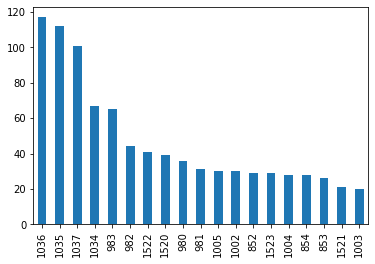

In [ ]:
#Gráfico de Barras
df["LojaID"].value_counts(ascending=False).plot.bar();

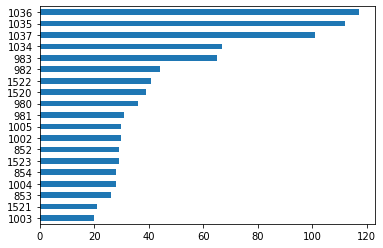

In [ ]:
#Grafico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

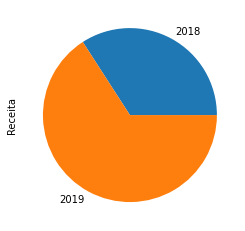

In [ ]:
#Gráfico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [ ]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

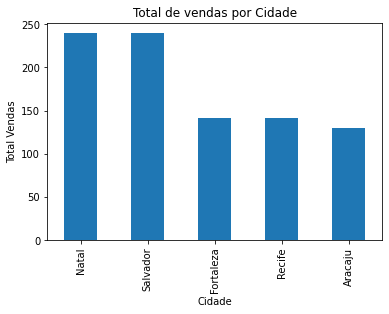

In [ ]:
#Adicionando um título e alterando o nome dos elementos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title= "Total de vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

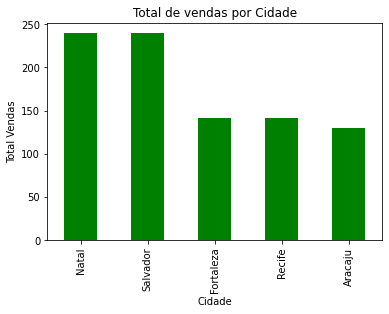

In [ ]:
#Alterando a cor 
df["Cidade"].value_counts().plot.bar(title= "Total de vendas por Cidade", color = "green")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [ ]:
#Alterando o estilo do gráfico
plt.style.use("ggplot")

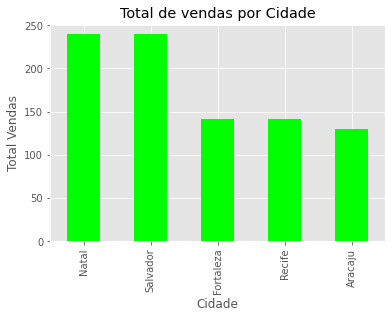

In [ ]:
df["Cidade"].value_counts().plot.bar(title= "Total de vendas por Cidade", color = "lime")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

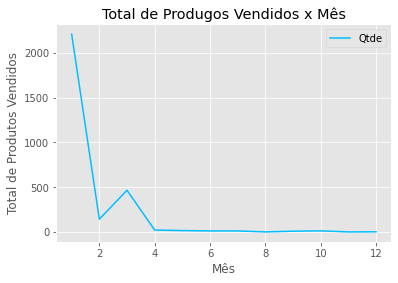

In [ ]:
df.groupby(df["Mes_Venda"])["Qtde"].sum().plot(title= "Total de Produgos Vendidos x Mês", color = "deepskyblue")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos");
plt.legend ();

In [ ]:
#Agrupamento do mês e a soma da quantidade
df.groupby(df["Mes_Venda"])["Qtde"].sum()

Mes_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

In [ ]:
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum()

Mes_Venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

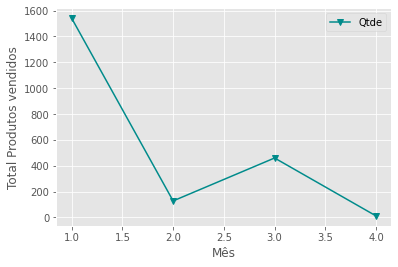

In [ ]:
#Total produtos vendidos por mês
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker = "v", color="darkcyan")
plt.xlabel("Mês")
plt.ylabel("Total Produtos vendidos");
plt.legend();

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

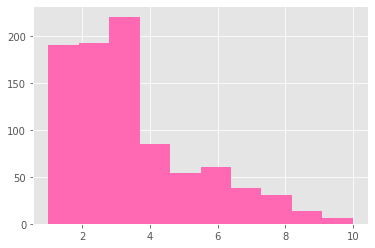

In [ ]:
#Histograma
plt.hist(df["Qtde"], color= "hotpink")

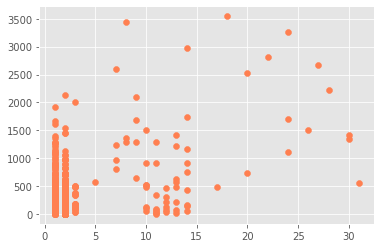

In [ ]:
#Gráfico de dispersão
plt.scatter(x= df_2019["Dia_Venda"], y= df_2019["Receita"], color="coral");

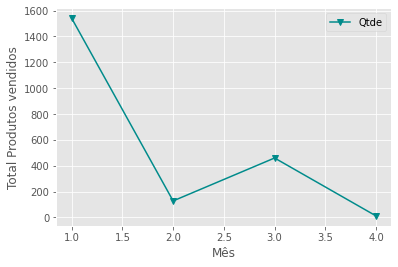

In [ ]:
#Salvando gráfico em png
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker = "v", color="darkcyan")
plt.xlabel("Mês")
plt.ylabel("Total Produtos vendidos");
plt.legend()
plt.savefig("grafico Qtde x Mês.png")